<a href="https://colab.research.google.com/github/chaitsugale/Stock-Market-Prediction-The-Spark-Foundation-/blob/main/Stock_Market_Prediction_Using_Numerical_and_Textual_Analysis(The_Spark_Foundation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction Using Numerical and Textual Analysis

Objective: Create a hybrid model for stock price/performance
prediction using numerical analysis of historical stock prices, and
sentimental analysis of news headlines

Here We are analyzing and predicting the stocks of BOMBAY STOCK EXCHANGE i.e. SENSEX (S&F BSE SENSEX) 

SENSEX or BOMBAY STOCK EXCHANGE is the oldest stock exchange in ASIA establishing in 1875.

## Step 1: Loading the Package

> Loading all the important packages for analyzing and predicting alonng with plotting graph



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import altair as alt  #Altair is a declarative statistical visualization library for Python

import statsmodels.api as sm 

from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.stattools import adfuller

In [2]:
import warnings
warnings.filterwarnings('ignore')

Here We will extracting the data of **Bombay Stock Exchange** from yahoo finance through **Python API**

So we are installing the PYPI yfinance

In [3]:
# installing pypi package for yahoo finance


!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import yfinance as yf

In [5]:
bse_data = yf.download('^BSESN',start = '2001-01-01',end = '2022-03-31')
print(bse_data)

[*********************100%***********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2001-01-02   3953.219971   4028.570068   3929.370117   4018.879883   
2001-01-03   3977.580078   4067.659912   3977.580078   4060.020020   
2001-01-04   4180.970215   4180.970215   4109.549805   4115.370117   
2001-01-05   4116.339844   4195.009766   4115.350098   4183.729980   
2001-01-08   4164.759766   4206.720215   4101.529785   4120.430176   
...                  ...           ...           ...           ...   
2022-03-24  57190.050781  57827.988281  57138.511719  57595.679688   
2022-03-25  57801.718750  57845.371094  57100.238281  57362.199219   
2022-03-28  57472.718750  57638.339844  56825.089844  57593.488281   
2022-03-29  57814.761719  58001.531250  57639.351562  57943.648438   
2022-03-30  58362.851562  58727.781250  58176.000000  58683.988281   

               Adj C

In [6]:
bse_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
bse_data.reset_index(inplace=True)

In [8]:
bse_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0


In [9]:
bse_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5229,2022-03-24,57190.050781,57827.988281,57138.511719,57595.679688,57595.679688,51400
5230,2022-03-25,57801.718750,57845.371094,57100.238281,57362.199219,57362.199219,6900
5231,2022-03-28,57472.718750,57638.339844,56825.089844,57593.488281,57593.488281,6300
5232,2022-03-29,57814.761719,58001.531250,57639.351562,57943.648438,57943.648438,12100
5233,2022-03-30,58362.851562,58727.781250,58176.000000,58683.988281,58683.988281,6300


In [10]:
bse_data.shape

(5234, 7)

In [11]:
bse_data.size#bse_data.to_csv('bse.csv')

36638

In [12]:
bse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5234 entries, 0 to 5233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5234 non-null   datetime64[ns]
 1   Open       5234 non-null   float64       
 2   High       5234 non-null   float64       
 3   Low        5234 non-null   float64       
 4   Close      5234 non-null   float64       
 5   Adj Close  5234 non-null   float64       
 6   Volume     5234 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 286.4 KB


In [13]:
bse_data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
bse_data['Date'] = pd.to_datetime(bse_data['Date'])

In [15]:
bse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5234 entries, 0 to 5233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5234 non-null   datetime64[ns]
 1   Open       5234 non-null   float64       
 2   High       5234 non-null   float64       
 3   Low        5234 non-null   float64       
 4   Close      5234 non-null   float64       
 5   Adj Close  5234 non-null   float64       
 6   Volume     5234 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 286.4 KB


In [16]:
def bse_stock_weekly_moving_avg(weeks,df):
  close_data = pd.DataFrame({'date': df['Date'] , 'close': df['Close']})
  close_data.set_index('date',inplace=True)
  num = weeks * 5
  close_data['moving_avg'] = close_data['close'].rolling(window = num).mean().shift()
  return close_data.dropna()

In [17]:
bse_stock_weekly_moving_avg(4,bse_data).head()

,close,moving_avg
date,,
2001-01-31,4326.720215,4153.535486
2001-02-01,4286.109863,4168.927502
2001-02-02,4352.259766,4180.231995
2001-02-05,4370.470215,4192.076477
2001-02-06,4375.290039,4201.413489


<AxesSubplot:xlabel='date'>

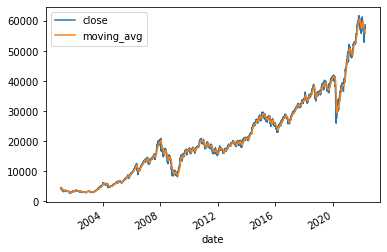

In [18]:
bse_stock_weekly_moving_avg(4,bse_data).plot()

Text(0, 0.5, 'Close')

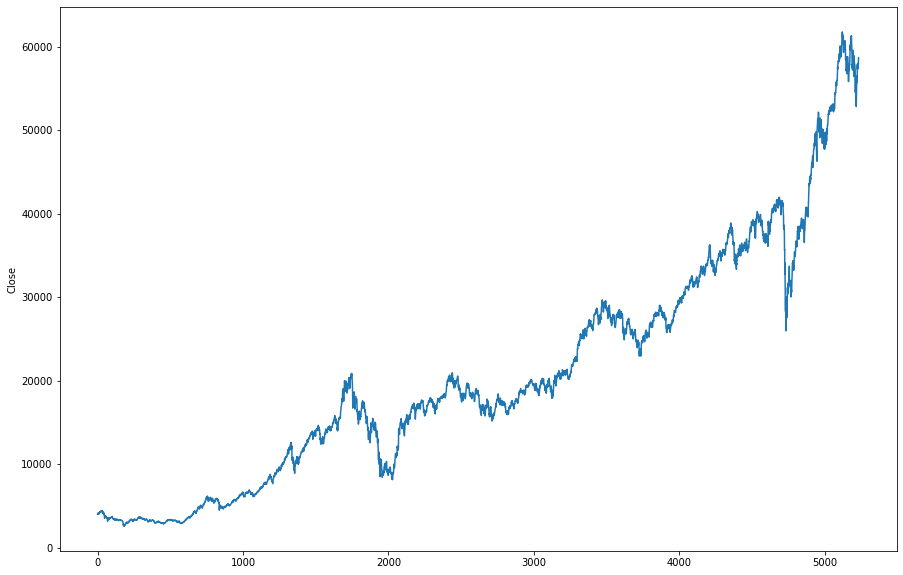

In [19]:
plt.figure(figsize=(15, 10))
bse_data['Close'].plot()
plt.ylabel('Close')

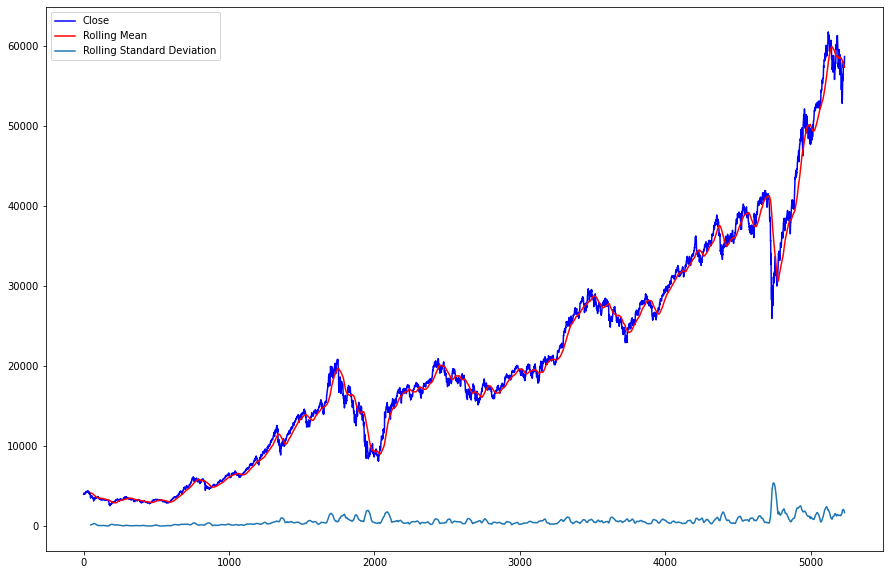

In [20]:
#Plotting moving average for window 50
bse_close = bse_data['Close']
ma_50 = bse_close.rolling(window = 50).mean()
std_50 = bse_close.rolling(window = 50).std()

plt.figure(figsize=(15, 10))
bse_data['Close'].plot(color = 'b', label = 'Close')
ma_50.plot(color = 'r', label = 'Rolling Mean')
std_50.plot(label = 'Rolling Standard Deviation')
plt.legend()

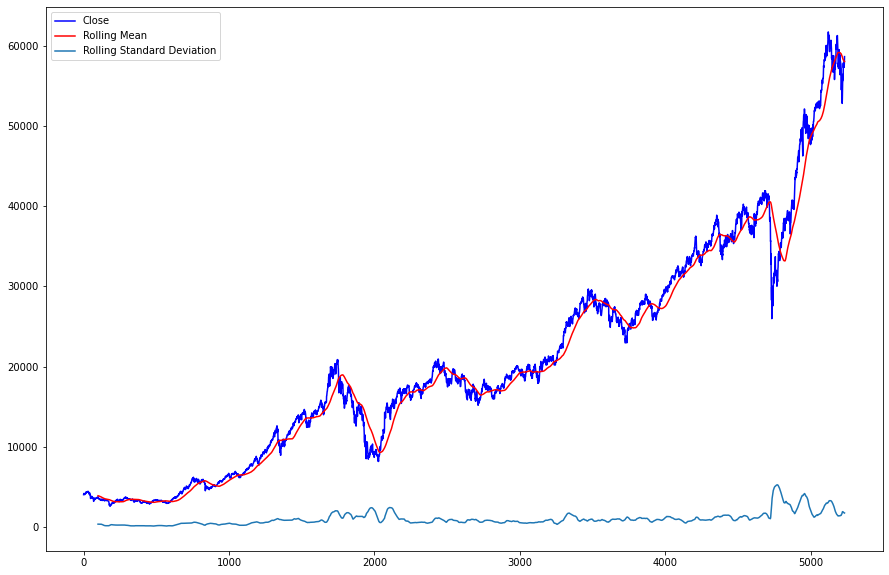

In [21]:
#Plotting moving average for window 100
bse_close = bse_data['Close']
ma_100 = bse_close.rolling(window = 100).mean()
std_100 = bse_close.rolling(window = 100).std()

plt.figure(figsize=(15, 10))
bse_data['Close'].plot(color = 'b', label = 'Close')
ma_100.plot(color = 'r', label = 'Rolling Mean')
std_100.plot(label = 'Rolling Standard Deviation')
plt.legend()

Text(0.5, 1.0, 'Returns')

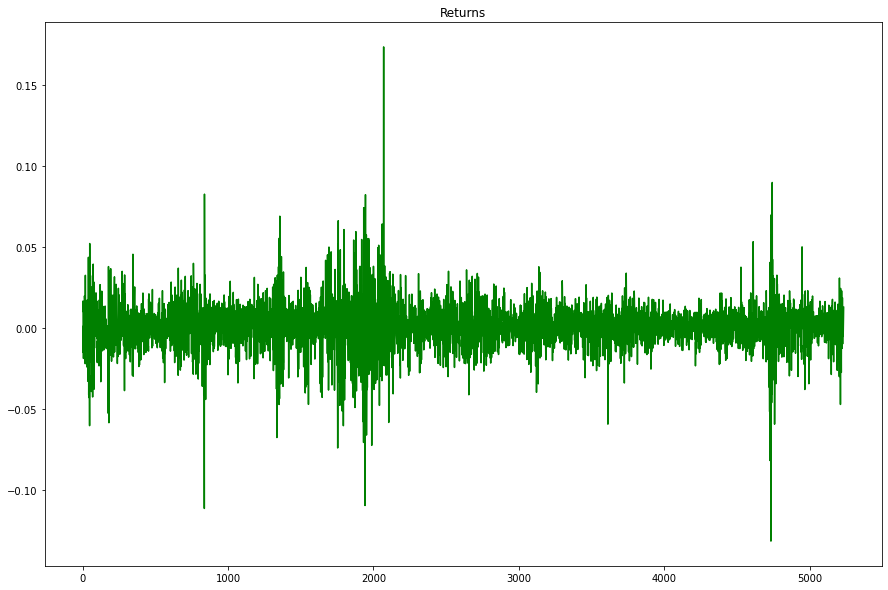

In [22]:
# Plotting return

bse_returns =  bse_close/bse_close.shift(1) - 1

plt.figure(figsize=(15, 10))

bse_returns.plot(label='Return' , color = 'green')

plt.title('Returns')

In [23]:
bse_train = bse_data[:2000]
bse_test = bse_data[2000:]

In [42]:
def test_stationary(timeseries):
  rolmean = timeseries.rolling(30).mean()
  rolstd = timeseries.rolling(30).std()

  plt.figure(figsize = (15,10))
  plt.plot(timeseries,color = 'y',label = 'original',linewidth=5.0)
  plt.plot(rolmean,color='r',label = 'rolling mean')
  plt.plot(rolstd,color = 'b',label = 'rolling standard')
  plt.xlabel('Date')
  plt.legend()
  plt.title('Rolling Mean and standard Deviation',fontsize = 25)
  #plt.title(timeseries)
  plt.show(block = False)

  print('**************Result of Dickey Fuller Test***************')
  result = adfuller(timeseries,autolag = 'AIC')
  print(result)
  labels = ['ADF Test Statistics' , 'p-value' ,'#Lags Used','Number of Observation Used','Critical Value']
  for value,label in zip(result,labels):
    print(label+ ' : ' +str(value))
  if result[1] <= 0.05:
  #if result[0] <= result[4]["5%"]:
    print('Reject the Null Hypothesis (Ho) test and the Time series is Stationary')
  else:
    print('Failed to Reject the Null Hypothesis (HO) Test and Time Series is Non Stationary')

************ BSE TRAIN CLOSE DATA *******************


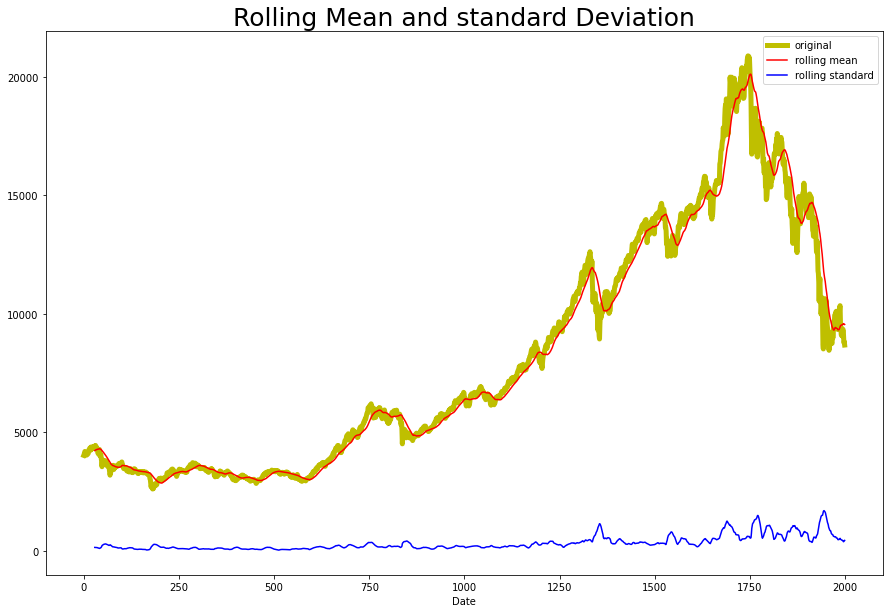

**************Result of Dickey Fuller Test***************
(-1.1111058766244453, 0.7106227498901768, 15, 1984, {'1%': -3.4336502927748587, '5%': -2.8629978852039737, '10%': -2.5675461168480913}, 26133.29611917469)
ADF Test Statistics : -1.1111058766244453
p-value : 0.7106227498901768
#Lags Used : 15
Number of Observation Used : 1984
Critical Value : {'1%': -3.4336502927748587, '5%': -2.8629978852039737, '10%': -2.5675461168480913}
Failed to Reject the Null Hypothesis (HO) Test and Time Series is Non Stationary


In [43]:
print('************ BSE TRAIN CLOSE DATA *******************')
test_stationary(bse_train['Close'])

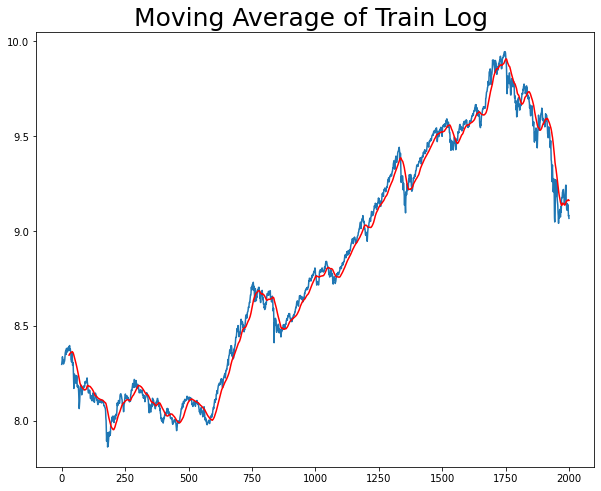

In [44]:
bse_train_log = np.log(bse_train['Close'])
bse_test_log = np.log(bse_test['Close'])

moving_avg_train = bse_train_log.rolling(30).mean()

plt.figure(figsize = (10,8))
plt.title('Moving Average of Train Log ',fontsize = 25)
plt.plot(bse_train_log)
plt.plot(moving_avg_train,color = 'red')

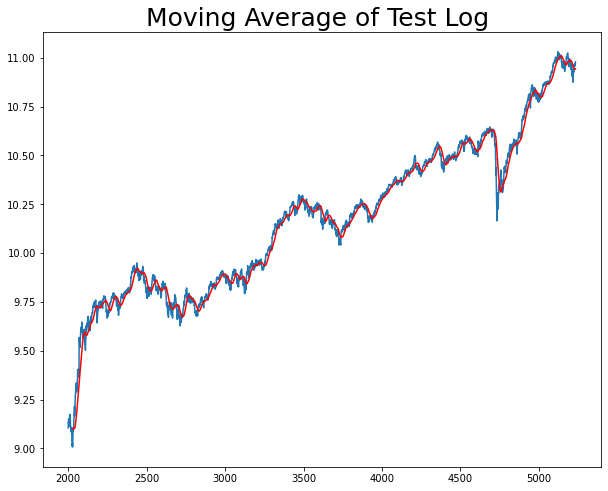

In [45]:
moving_avg_test = bse_test_log.rolling(30).mean()

plt.figure(figsize = (10,8))
plt.title('Moving Average of Test Log ',fontsize = 25)
plt.plot(bse_test_log)
plt.plot(moving_avg_test,color = 'red')

In [46]:
bse_train_log.isnull().sum()

0

In [47]:
bse_test_log.isnull().sum()

0

************* BSE TRAIN LOG DATA **********


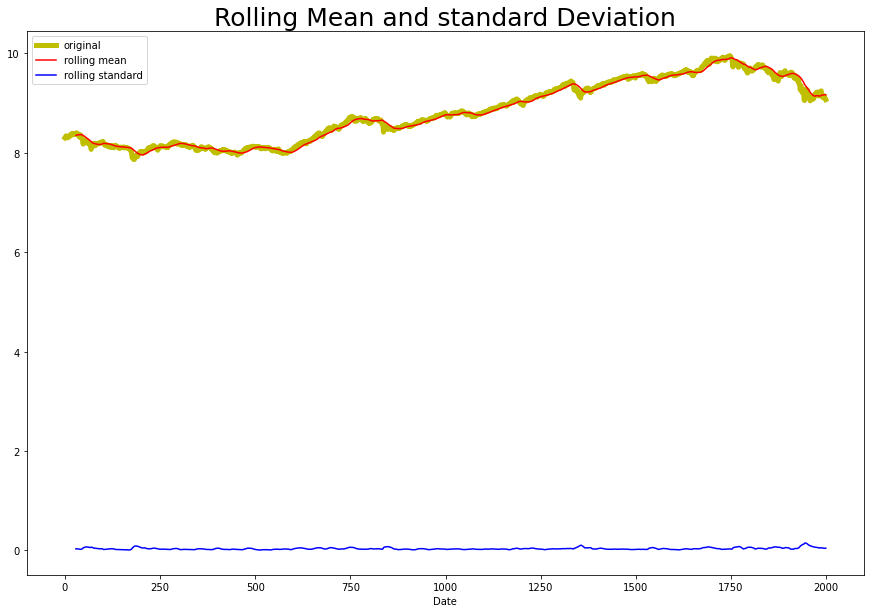

**************Result of Dickey Fuller Test***************
(-0.8224426534313333, 0.812440661429292, 2, 1997, {'1%': -3.4336287809345873, '5%': -2.862988387691722, '10%': -2.5675410598947996}, -10488.264332187675)
ADF Test Statistics : -0.8224426534313333
p-value : 0.812440661429292
#Lags Used : 2
Number of Observation Used : 1997
Critical Value : {'1%': -3.4336287809345873, '5%': -2.862988387691722, '10%': -2.5675410598947996}
Failed to Reject the Null Hypothesis (HO) Test and Time Series is Non Stationary


In [48]:
bse_train_log.dropna(inplace=True)
bse_test_log.dropna(inplace=True)

print('************* BSE TRAIN LOG DATA **********')

test_stationary(bse_train_log)

************* BSE TEST LOG DATA **********


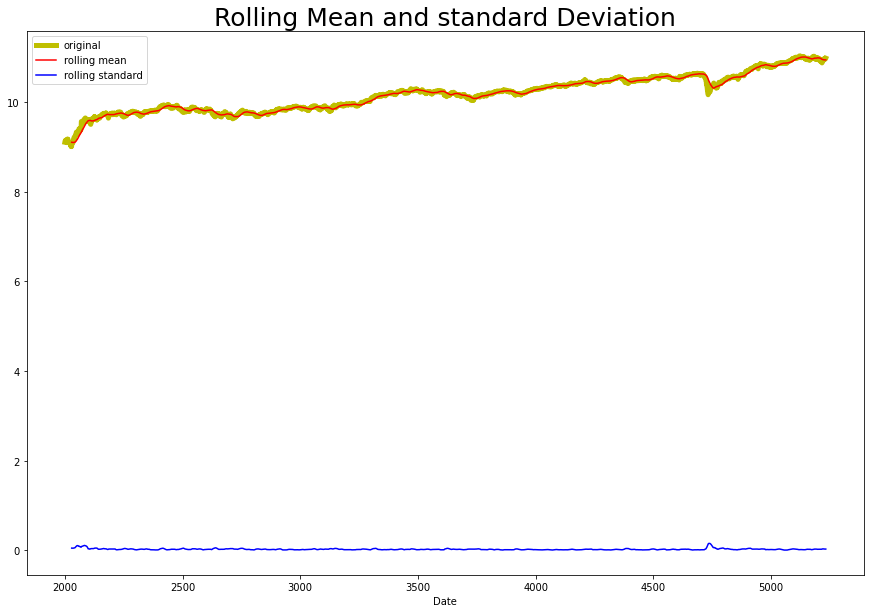

**************Result of Dickey Fuller Test***************
(-1.81945548167051, 0.37084625812948474, 17, 3216, {'1%': -3.4323849898033263, '5%': -2.862439135700757, '10%': -2.5672486298026347}, -19325.46419694628)
ADF Test Statistics : -1.81945548167051
p-value : 0.37084625812948474
#Lags Used : 17
Number of Observation Used : 3216
Critical Value : {'1%': -3.4323849898033263, '5%': -2.862439135700757, '10%': -2.5672486298026347}
Failed to Reject the Null Hypothesis (HO) Test and Time Series is Non Stationary


In [49]:
print('************* BSE TEST LOG DATA **********')

test_stationary(bse_test_log)

In [50]:
bse_train_log_diff = bse_train_log - moving_avg_train

print(bse_train_log_diff)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1995   -0.024343
1996   -0.050517
1997   -0.084801
1998   -0.080292
1999   -0.094420
Name: Close, Length: 2000, dtype: float64


In [51]:
bse_train_log_diff.isna().sum()

29

In [52]:
bse_train_log_diff.dropna(inplace=True)

In [53]:
bse_train_log_diff

29      0.033506
30      0.030780
31      0.044829
32      0.018572
33      0.021952
          ...   
1995   -0.024343
1996   -0.050517
1997   -0.084801
1998   -0.080292
1999   -0.094420
Name: Close, Length: 1971, dtype: float64

******************Train Log Difference Data ****************


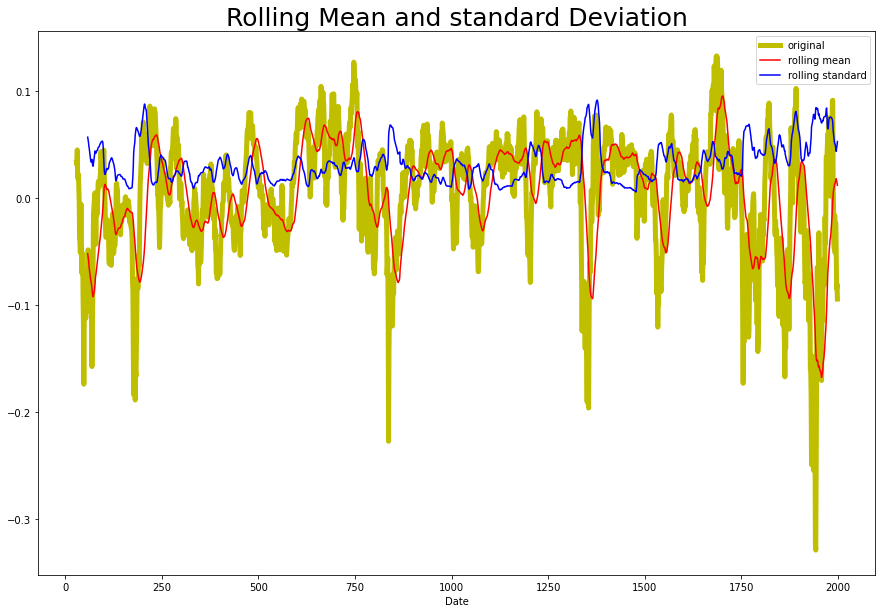

**************Result of Dickey Fuller Test***************
(-6.792287883205861, 2.34804433795852e-09, 2, 1968, {'1%': -3.4336771595431106, '5%': -2.863009746829746, '10%': -2.5675524325901415}, -10495.737913598818)
ADF Test Statistics : -6.792287883205861
p-value : 2.34804433795852e-09
#Lags Used : 2
Number of Observation Used : 1968
Critical Value : {'1%': -3.4336771595431106, '5%': -2.863009746829746, '10%': -2.5675524325901415}
Reject the Null Hypothesis (Ho) test and the Time series is Stationary


In [54]:
print('******************Train Log Difference Data ****************')

test_stationary(bse_train_log_diff)

In [55]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
from pmdarima import auto_arima

In [57]:
bse_model = auto_arima(bse_train_log,trace=True,error_action = 'ignore',supress_warning = True)
bse_model.fit(bse_train_log)

bse_prediction = bse_model.predict(n_periods = len(bse_test))
bse_prediction = pd.DataFrame(bse_prediction,index=bse_test_log.index,columns = ['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-10632.222, Time=3.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-10614.451, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-10628.018, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-10630.204, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-10615.426, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-10634.189, Time=1.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-10635.024, Time=1.76 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-10634.291, Time=1.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-10632.366, Time=0.52 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-10632.235, Time=2.13 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-10636.031, Time=1.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-10631.461, Time=0.72 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-10635.154, Time=1.57 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-10635.272, Time=1.42 sec
 ARIM

Text(0, 0.5, 'Actual Stock Price')

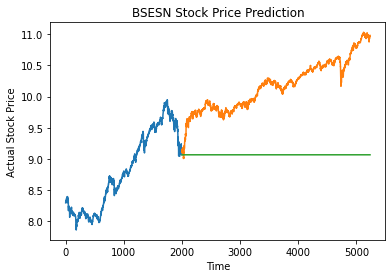

In [58]:

plt.plot(bse_train_log, label='Train')
plt.plot(bse_test_log, label='Test')
plt.plot(bse_prediction, label='Prediction')
plt.title('BSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
     

In [59]:
rms = np.sqrt(mean_squared_error(bse_test_log,bse_prediction))
print("RMSE : ", rms)

RMSE :  1.1801075906494265
